## Starter code for simple linear regression example using placeholders

In [1]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

In [2]:
DATA_FILE = 'data/birth_life_2010.txt'
EVENT_FILE = 'logs/linreg'

In [3]:
# Step 1: read in data from the .txt file
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [4]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
# Remember both X and Y are scalars with type float
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [5]:
# Step 3: create weight and bias, initialized to 0.0
# Make sure to use tf.get_variable
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [6]:
# Step 4: build model to predict Y
# e.g. how would you derive at Y_predicted given X, w, and b
Y_predicted = w * X + b 

In [7]:
# Step 5: use the square error as the loss function
# you can use either mean squared error or Huber loss
loss = tf.square(Y - Y_predicted, name="loss")
# loss = utils.huber_loss(Y, Y_predicted)

In [8]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

start = time.time()

In [9]:
# Create a filewriter to write the model's graph to TensorBoard
start = time.time()
writer = tf.summary.FileWriter(EVENT_FILE, tf.get_default_graph())

In [16]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 

    # Step 8: train the model for 100 epochs
    for i in range(100): 
        total_loss = 0
        for x, y in data:
            # Session execute optimizer and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        
        if i % 10 == 0:
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b]) 

print('Took: %f seconds' %(time.time() - start))

Epoch 0: 1661.863764550287
Epoch 10: 335.55436177954664
Epoch 20: 119.20935661137888
Epoch 30: 55.77163058824279
Epoch 40: 37.305592010505066
Epoch 50: 32.004961317298495
Epoch 60: 30.524589418089263
Epoch 70: 30.134226098457216
Epoch 80: 30.04458791257593
Epoch 90: 30.03209388247043
Took: 653.446285 seconds


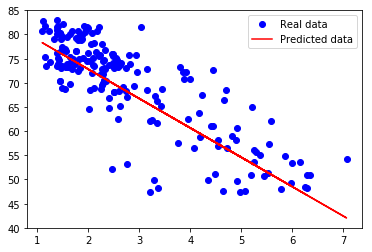

In [33]:
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()